# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1. Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
# conda install openpyxl

In [2]:
# conda install pandas

In [3]:
# conda install matplotlib

In [4]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

In [5]:
# Ne pas affichier les WARNING
import warnings
warnings.simplefilter("ignore")

In [6]:
#On importe les données dans un dataframe
url_histo_immo = "https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Business+Intelligence+Analyst/BIA_project+8/historique_immobilier_paris_2017_2021_vdef2.xlsx"
url_portefeuille_actifs = "https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Business+Intelligence+Analyst/BIA_project+8/portefeuille_actifs+(3).xlsx"
df_histo_immo = pd.read_excel(url_histo_immo)
df_portefeuille_actifs = pd.read_excel(url_portefeuille_actifs)

display (df_histo_immo.head(2))
display (df_portefeuille_actifs.head(2))

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163


,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [7]:
#On vérifie que le type des données attribué par pandas est cohérent
display('Les type des variables : ', df_histo_immo.dtypes)
df_histo_immo.info ()

'Les type des variables : '

date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


In [8]:
df_portefeuille_actifs.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [9]:
# Liste des différents types de biens immobiliers
Liste_differents_biens_immobiliers = df_histo_immo["type_local"].unique()
print("La liste des différents types de biens immobiliers que nous avons dans les données est: {}".format(Liste_differents_biens_immobiliers))

# Comptage des occurrences de chaque type de bien immobilier
comptage_types = df_histo_immo["type_local"].value_counts()
print("\nLe nombre de chaque type de bien immobilier est :\n{}".format(comptage_types))

# Suppression des doublons pour 'code_type_local' et 'type_local'
df_histo_immo[['code_type_local', 'type_local']].drop_duplicates()

La liste des différents types de biens immobiliers que nous avons dans les données est: ['Appartement' 'Local industriel. commercial ou assimilé']

Le nombre de chaque type de bien immobilier est :
type_local
Appartement                                 24353
Local industriel. commercial ou assimilé     1843
Name: count, dtype: int64


,code_type_local,type_local
0,2,Appartement
18,4,Local industriel. commercial ou assimilé


On observe qu'il y a 2 types de biens et que leurs codes types sont 2 (appartement) ou 4 (local industriel, commercial ou assimilé).

##### Le portefeuille d'actifs comprend 154 appartements et 121 locaux industriels, commerciaux ou assimilés.

In [10]:
#Nombre d'appartements par arrondissement de Paris dans le portefeuille d'actifs
appartements = df_portefeuille_actifs[df_portefeuille_actifs["type_local"] == "Appartement"]
nombre_appartements_par_arrondissement = appartements.groupby("code_postal").size()
print(nombre_appartements_par_arrondissement)
appartements.shape [0]

code_postal
75001     1
75002     7
75003    16
75005     1
75006     1
75007     1
75008     6
75009     6
75010    22
75011     4
75012     5
75014     3
75015     2
75016     2
75017    19
75018    28
75019    15
75020    15
dtype: int64


154

In [11]:
locaux_corporate = df_portefeuille_actifs[df_portefeuille_actifs["type_local"] == "Local industriel. commercial ou assimilé"]
nombre_locaux_corporate_par_arrondissement = locaux_corporate.groupby("code_postal").size()
print(nombre_locaux_corporate_par_arrondissement)
locaux_corporate.shape [0]

code_postal
75001     4
75002     5
75003     7
75004     1
75005     2
75006     6
75007     1
75008     9
75009     5
75010     5
75011     8
75012     9
75013     8
75014     8
75015     7
75016    12
75017    13
75018     6
75019     3
75020     2
dtype: int64


121

### 3. Nombre de transactions

In [12]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print("Le nombre de transactions dans les données est 26196.")
nombre_appartements = df_histo_immo[df_histo_immo["type_local"] == "Appartement"].shape[0]
print("Le nombre de transactions pour les appartements dans les données est {}.".format(nombre_appartements))
nombre_local_industriel_commercial = df_histo_immo[df_histo_immo["type_local"] == "Local industriel. commercial ou assimilé"].shape [0]
print("Le nombre de transactions pour les locaux commerciaux dans les données est {}.".format (nombre_local_industriel_commercial))

Le nombre de transactions dans les données est 26196.
Le nombre de transactions pour les appartements dans les données est 24353.
Le nombre de transactions pour les locaux commerciaux dans les données est 1843.


### 4. interval de l'historique des données

In [13]:
#On vérifie également la plage de l'historique disponible
print("La première date de transaction dans les données est le {}.".format (min(df_histo_immo ["date_mutation"])))
print("La dernière date de transaction dans les données est le {}.".format (max(df_histo_immo ["date_mutation"])))

La première date de transaction dans les données est le 2017-01-02 00:00:00.
La dernière date de transaction dans les données est le 2021-12-31 00:00:00.


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [14]:
# Calcul de la colonne : conversion des valeurs en types numériques et calcul du prix au m2
df_histo_immo["valeur_fonciere"] = pd.to_numeric(df_histo_immo["valeur_fonciere"], errors="coerce")
df_histo_immo["surface_reelle"] = pd.to_numeric(df_histo_immo["surface_reelle"], errors="coerce")
df_histo_immo["prix_m2"] = df_histo_immo["valeur_fonciere"] / df_histo_immo["surface_reelle"]
df_histo_immo.head (1)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,550559.678082,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.193562


Maintenant, analysons les appartements.

### 5. Evolution du prix au mètre carré des appartements dans Paris

In [15]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_evolution_prix_m2_appart_paris = df_histo_immo[df_histo_immo["type_local"] == "Appartement"].drop (columns=["adresse_numero", "adresse_nom_voie", "nom_commune", "code_type_local", "type_local"])
df_evolution_prix_m2_appart_paris.head()


,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,75003,50,11011.193562
1,2017-01-12,1.576492e+06,75008,163,9671.732877
2,2017-01-10,6.577574e+05,75008,66,9966.020548
3,2017-01-10,2.500868e+05,75003,22,11367.582877
4,2017-01-13,1.762667e+05,75001,15,11751.113836


In [16]:
df_evolution_prix_m2_appart_paris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24353 entries, 0 to 26195
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_mutation    24353 non-null  datetime64[ns]
 1   valeur_fonciere  24353 non-null  float64       
 2   code_postal      24353 non-null  int64         
 3   surface_reelle   24353 non-null  int64         
 4   prix_m2          24353 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.1 MB


In [17]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
#Création de la colonne "annee"
df_evolution_prix_m2_appart_paris["annee"] = df_evolution_prix_m2_appart_paris["date_mutation"].dt.year
df_evolution_prix_m2_appart_paris.head (1)

,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_m2,annee
0,2017-01-03,550559.678082,75003,50,11011.193562,2017


In [18]:
#Prix moyens de ventes des appartements par année avec la surface moyenne associée
prix_moyens_ventes_appart_par_annee = df_evolution_prix_m2_appart_paris.groupby("annee")[["valeur_fonciere", "surface_reelle", "prix_m2"]].mean().round(2)
display (prix_moyens_ventes_appart_par_annee)

,valeur_fonciere,surface_reelle,prix_m2
annee,,,
2017,427963.24,44.63,9492.86
2018,448055.76,44.27,10031.40
2019,461950.06,43.36,10562.71
2020,462383.25,42.90,10674.87
2021,458771.51,43.48,10455.60


On constate sur la moyenne des prix de vente des appartements à Paris que la valeur foncière des appartements a augmenté jusqu'en 2020 et a commencé à décliner ensuite.
Nous allons créer un graphique pour mieux le visualiser.

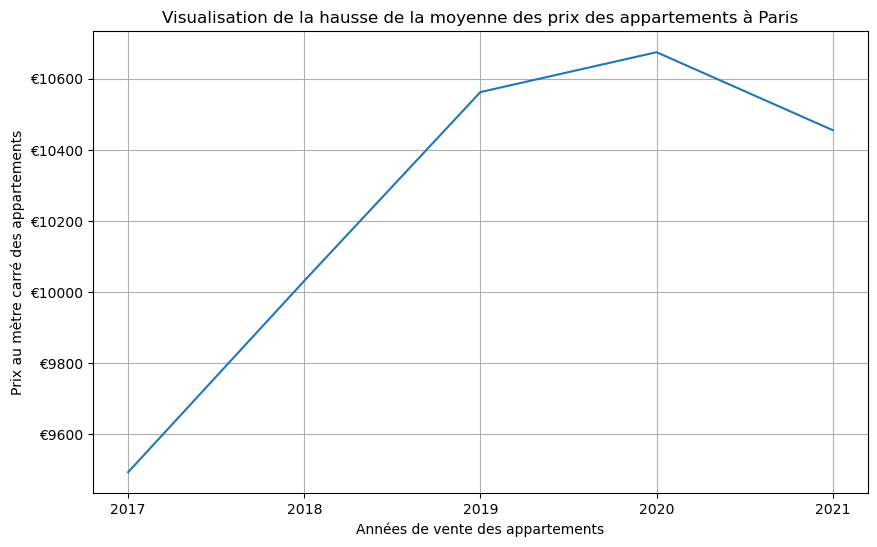

In [19]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,6))
plt.plot(prix_moyens_ventes_appart_par_annee.index.astype(str),prix_moyens_ventes_appart_par_annee["prix_m2"])
plt.xlabel("Années de vente des appartements")
plt.ylabel("Prix au mètre carré des appartements")
formatter = ticker.FormatStrFormatter("€%d")
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title("Visualisation de la hausse de la moyenne des prix des appartements à Paris")
plt.show()

### 6. Différences de prix au mètre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [20]:
#Liste des codes postaux dans nos données
liste_codes_postaux = df_portefeuille_actifs ["code_postal"].unique ()
liste_codes_postaux.sort()
display (liste_codes_postaux)

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020])

In [21]:
#Créons un dataframe pour une deuxième visualisation avec l'évolution des prix par arrondissement
evolution_prix_par_arrondissement_annee = df_evolution_prix_m2_appart_paris.groupby(["code_postal", "annee"]).mean().round(2).reset_index()
# Afficher le résultat
display(evolution_prix_par_arrondissement_annee)

,code_postal,annee,date_mutation,valeur_fonciere,surface_reelle,prix_m2
0,75001,2017,2017-07-01 19:18:37.241379328,530392.41,45.24,11762.71
1,75001,2018,2018-06-24 08:34:17.142857216,581390.37,46.01,12621.23
2,75001,2019,2019-06-19 02:38:14.505494528,454606.24,34.31,13269.26
3,75001,2020,2020-07-05 19:12:00.000000000,601204.89,44.87,13405.99
4,75001,2021,2021-07-11 08:45:42.857142784,639321.08,47.78,13379.50
...,...,...,...,...,...,...
95,75020,2017,2017-06-26 05:57:42.420382208,313979.41,39.78,7886.02
96,75020,2018,2018-07-10 17:54:25.634674944,316909.31,37.34,8485.16
97,75020,2019,2019-07-09 03:42:30.437317888,322005.37,35.38,9093.99
98,75020,2020,2020-06-28 20:50:06.593406720,316868.86,33.94,9329.31


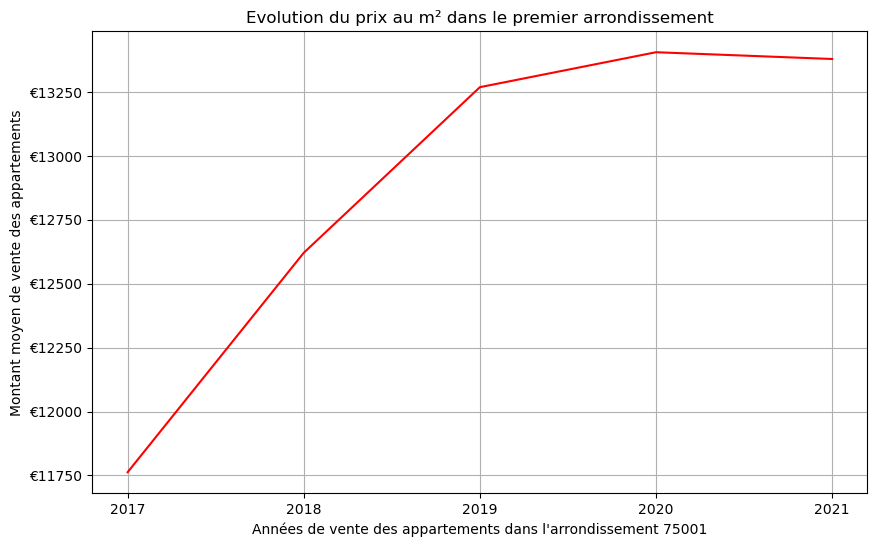

In [22]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au mètre carré dans le premier arrondissement
plt.figure(figsize=(10,6))
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75001]['prix_m2'],color='red')
plt.xlabel("Années de vente des appartements dans l'arrondissement 75001")
plt.ylabel("Montant moyen de vente des appartements")
formatter = ticker.FormatStrFormatter("€%d")
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

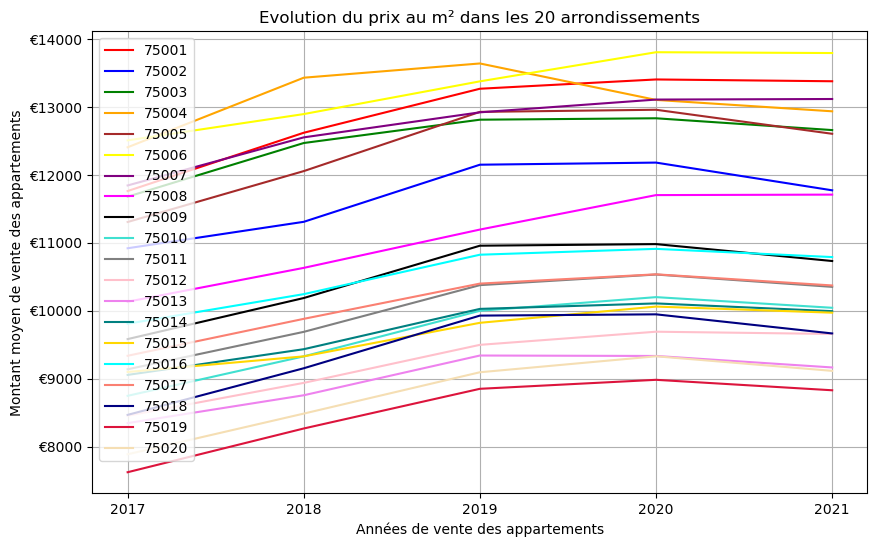

In [23]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(10,6))
interval_historique=['2017','2018','2019','2020','2021']
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75001]['prix_m2'],color='red', label = '75001')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75002]['prix_m2'],color='blue', label = '75002')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75003]['prix_m2'],color='green', label = '75003')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75004]['prix_m2'],color='orange', label = '75004')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75005]['prix_m2'],color='brown', label = '75005')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75006]['prix_m2'],color='yellow', label = '75006')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75007]['prix_m2'],color='purple', label = '75007')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75008]['prix_m2'],color='magenta', label = '75008')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75009]['prix_m2'],color='black', label = '75009')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75010]['prix_m2'],color='turquoise', label = '75010')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75011]['prix_m2'],color='grey', label = '75011')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75012]['prix_m2'],color='pink', label = '75012')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75013]['prix_m2'],color='violet', label = '75013')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75014]['prix_m2'],color='teal', label = '75014')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75015]['prix_m2'],color='gold', label = '75015')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75016]['prix_m2'],color='cyan', label = '75016')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75017]['prix_m2'],color='salmon', label = '75017')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75018]['prix_m2'],color='navy', label = '75018')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75019]['prix_m2'],color='crimson', label = '75019')
plt.plot(['2017','2018','2019','2020','2021'],evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal']==75020]['prix_m2'],color='wheat', label = '75020')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

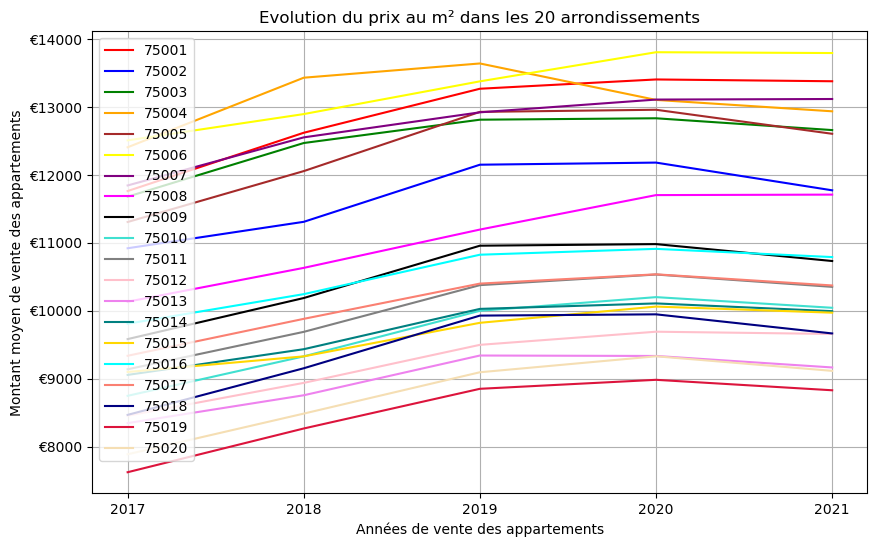

In [24]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
codes_postaux = [75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 
                 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020]
couleurs = ['red', 'blue', 'green', 'orange', 'brown', 'yellow', 'purple', 'magenta', 
            'black', 'turquoise', 'grey', 'pink', 'violet', 'teal', 'gold', 'cyan', 
            'salmon', 'navy', 'crimson', 'wheat']

# Tracé des courbes pour chaque code postal
plt.figure(figsize=(10,6))
interval_historique=['2017','2018','2019','2020','2021']
for code_postal, couleur in zip(codes_postaux, couleurs):
    plt.plot(['2017', '2018', '2019', '2020', '2021'], 
             evolution_prix_par_arrondissement_annee.loc[evolution_prix_par_arrondissement_annee['code_postal'] == code_postal]['prix_m2'], 
             color=couleur)

# Ajout des labels pour la légende
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')

# Ajout de la légende avec les codes postaux
plt.legend([str(code) for code in codes_postaux], loc='upper left')

plt.show()

On observe globalement que le prix des appartements au m2 a évolué dans tous les arrondissements de Paris jusque fin 2018, puis la croissance a ralenti entre 2019 et 2020 pour stagner et commencer à décliner dans environ 50% des arrondissements. A noter que le prix au m2 dans le 4ème arrondissement a décliné à partir de fin 2018. Il s'est fait détrôner par le 6ème, le 1er et le 7ème arrondissements où le prix au m2 est plus élevé.

### 7. Prix au mètre carré par transaction dans un arrondissement

In [25]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
nbre_transactions_appart_75006 = np.shape(df_evolution_prix_m2_appart_paris.loc[df_evolution_prix_m2_appart_paris['code_postal']==75006])[0]
# Afficher le résultat
print("Le nombre de transactions dans le 6ème arrondissement est : {}.".format (nbre_transactions_appart_75006))

Le nombre de transactions dans le 6ème arrondissement est : 709.


On constate que 709 transactions sur 24353 concernent le 6ème arrondissement, ce qui représente un peu moins de 3% des transactions.
Affichons l'historique des transactions pour visualiser la dispersion des données :

In [26]:
historique_transactions_appart_75006 = df_evolution_prix_m2_appart_paris[df_evolution_prix_m2_appart_paris["code_postal"] == 75006]
display (historique_transactions_appart_75006)

,date_mutation,valeur_fonciere,code_postal,surface_reelle,prix_m2,annee
478,2017-01-10,9.601314e+05,75006,78,12309.376712,2017
482,2017-01-13,8.204362e+05,75006,68,12065.237671,2017
484,2017-01-13,1.796112e+06,75006,143,12560.221781,2017
488,2017-01-17,2.488198e+05,75006,20,12440.991370,2017
491,2017-01-19,4.828724e+05,75006,40,12071.808904,2017
...,...,...,...,...,...,...
24915,2021-12-22,1.360988e+06,75006,97,14030.803836,2021
24953,2021-12-16,9.705679e+05,75006,72,13480.109589,2021
24956,2021-12-27,2.525194e+05,75006,18,14028.857260,2021
25013,2021-12-24,6.051571e+05,75006,44,13753.571507,2021


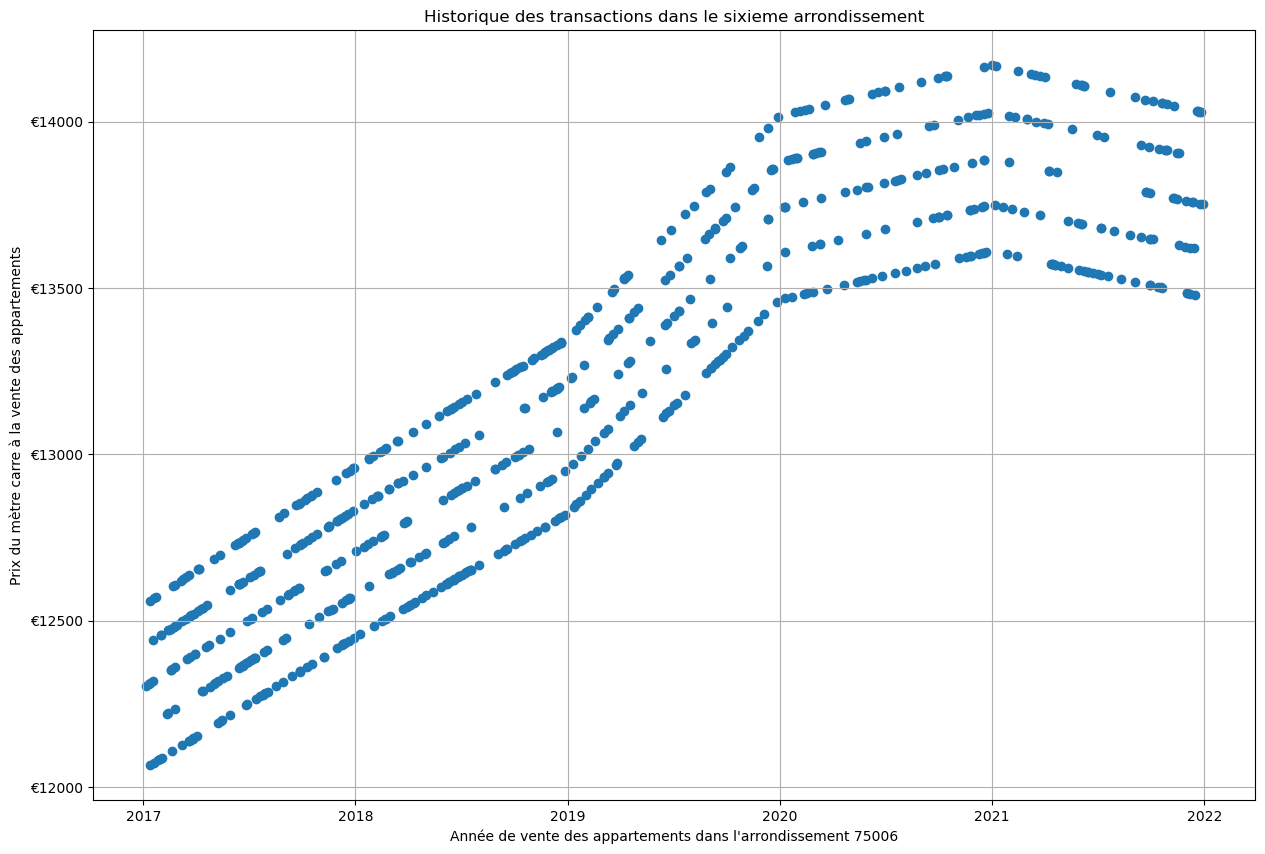

In [27]:
cp=75006
plt.figure(figsize=(15,10))
#Insérer ci-dessous le scatter plot
plt.scatter(df_evolution_prix_m2_appart_paris.loc[df_evolution_prix_m2_appart_paris['code_postal']==cp]['date_mutation'],df_evolution_prix_m2_appart_paris.loc[df_evolution_prix_m2_appart_paris['code_postal']==cp]['prix_m2'])
plt.xlabel("Année de vente des appartements dans l'arrondissement 75006")
plt.ylabel("Prix du mètre carre à la vente des appartements")
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

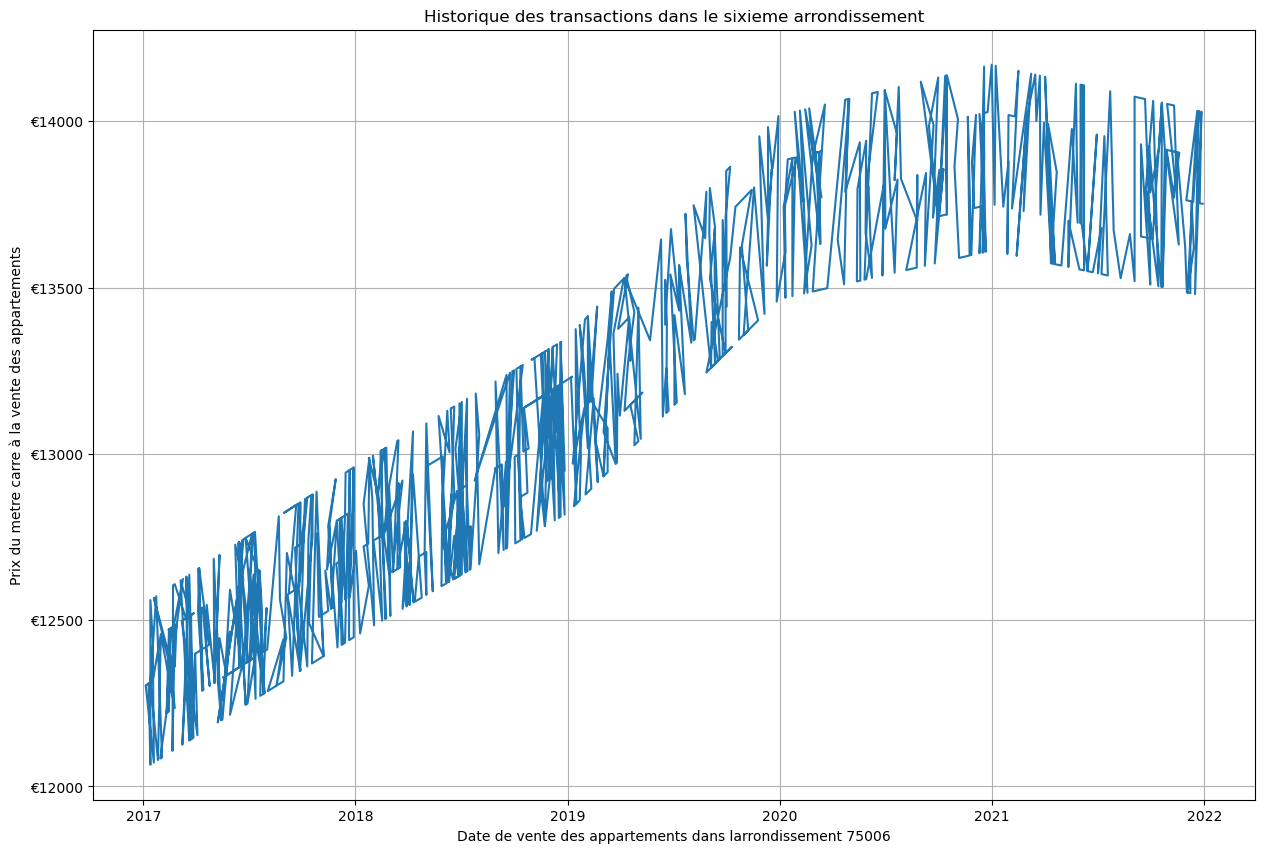

In [28]:
## Proposition d'Armen
cp=75006
plt.figure(figsize=(15,10))

#Insérer ci-dessous le scatter plot
plt.plot(df_evolution_prix_m2_appart_paris[df_evolution_prix_m2_appart_paris['code_postal']==cp]['date_mutation']
         , df_evolution_prix_m2_appart_paris[df_evolution_prix_m2_appart_paris['code_postal']==cp]["prix_m2"])
plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
# plt.ylim(df_evolution_prix_m2_appart_paris["prix_m2"].min(), df_evolution_prix_m2_appart_paris["prix_m2"].max())
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe qu'il y a eu de moins en moins de ventes d'appartements dans la fourchette haute des prix au m2 au fil des années et que la courbe de croissance de vente d'appartements dans le 6ème arrondissement de Paris a commencé à ralentir en 2020 et puis à décliner à partir de 2021.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [29]:
#conda install scipy

In [30]:
#On calcule la corrélation de Pearson
from scipy import stats
stats.pearsonr((df_evolution_prix_m2_appart_paris.loc[df_evolution_prix_m2_appart_paris['code_postal']==75006]['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9), df_evolution_prix_m2_appart_paris.loc[df_evolution_prix_m2_appart_paris['code_postal']==75006]['prix_m2'])

PearsonRResult(statistic=0.9038446031491486, pvalue=7.10837896255508e-263)

Le coefficient de corrélation est de 0.9038446031491486 avec une pvalue de 7.10837896255508e-263, donc nous pouvons confirmer la corrélation. En effet, le coefficient de corrélation de Pearson 𝑟 indique une corrélation très forte et positive entre les deux variables. Cela signifie qu'il existe une relation linéaire très significative où, lorsque l'une des variables augmente, l'autre a également tendance à augmenter. La p-value est extrêmement petite. Cela signifie que la probabilité que cette corrélation soit due au hasard est quasi inexistante. 

### 9. Vérification de la relation entre la valeur foncière et la surface

#### Pour les appartements dans le 6ème arrondissement de Paris

In [31]:
stats.pearsonr((df_evolution_prix_m2_appart_paris.loc[df_evolution_prix_m2_appart_paris['code_postal']==75006]['valeur_fonciere']),
               df_evolution_prix_m2_appart_paris.loc[df_evolution_prix_m2_appart_paris['code_postal']==75006]['surface_reelle'])

PearsonRResult(statistic=0.9977572898250283, pvalue=0.0)

#### Pour les appartements de tous les arrondissements de Paris

In [32]:
stats.pearsonr(df_evolution_prix_m2_appart_paris ['valeur_fonciere'], df_evolution_prix_m2_appart_paris ['surface_reelle'])

PearsonRResult(statistic=0.9801182734228788, pvalue=0.0)

#### Pour tous les biens, locaux industriels, commerciaux ou assimilés compris

In [33]:
stats.pearsonr(df_histo_immo ['valeur_fonciere'], df_histo_immo ['surface_reelle'])

PearsonRResult(statistic=0.9835604610065017, pvalue=0.0)

Il existe une très forte corrélation positive entre les deux variables et la relation est statistiquement significative (p ≈ 0). La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au mètre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [34]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_evolution_prix_m2_locaux_paris = df_histo_immo[df_histo_immo["type_local"] == "Local industriel. commercial ou assimilé"]

In [35]:
#Création de la colonne "annee"
df_evolution_prix_m2_locaux_paris["annee"] = df_evolution_prix_m2_locaux_paris["date_mutation"].dt.year
df_evolution_prix_m2_locaux_paris.head (1)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,annee
18,2017-02-01,3.113277e+06,65,RUE DE TURBIGO,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.109192,2017


In [36]:
#Préparons un dataframe en regroupant les prix au mètre carré moyens des ventes par année
prix_moyens_ventes_locaux_par_annee = df_evolution_prix_m2_locaux_paris.groupby("annee")[["valeur_fonciere", "surface_reelle", "prix_m2"]].mean().round(2)
display (prix_moyens_ventes_locaux_par_annee)

,valeur_fonciere,surface_reelle,prix_m2
annee,,,
2017,965459.45,89.99,10949.91
2018,1003463.18,88.10,11569.50
2019,992822.16,82.83,11960.13
2020,1034380.46,85.63,11966.47
2021,1129357.18,92.83,12006.49


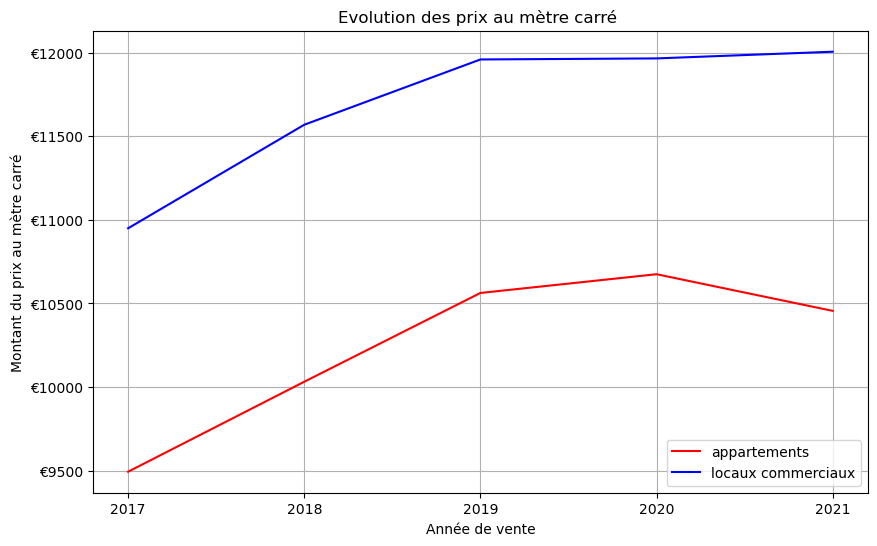

In [37]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,6))
plt.plot(['2017','2018','2019','2020','2021'], prix_moyens_ventes_appart_par_annee ['prix_m2'], label='appartements',color='red')
plt.plot(['2017','2018','2019','2020','2021'], prix_moyens_ventes_locaux_par_annee ['prix_m2'], label='locaux commerciaux',color='blue')
plt.xlabel('Année de vente')
plt.ylabel('Montant du prix au mètre carré')
plt.legend(loc='lower right')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au mètre carré ')
plt.show()

Le prix au mètre carré des appartements est inférieur à celui des locaux commerciaux et il est en baisse depuis 2020.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entraîner un algorithme à prédire la valeur foncière d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

In [38]:
#conda install sklearn

In [39]:
#pip install scikit-learn

In [40]:
from sklearn.linear_model import LinearRegression

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [41]:
#df_histo_immo_encode = pd.get_dummies(df_histo_immo, columns=['code_postal', 'type_local'], drop_first=False)
#display (df_histo_immo_encode)
df_histo_immo_encode=df_histo_immo.join(pd.get_dummies(df_histo_immo['code_postal']))
df_histo_immo_encode=df_histo_immo_encode.join(pd.get_dummies(df_histo_immo['type_local']))
df_histo_immo_encode['timestamp']=df_histo_immo_encode['date_mutation'].astype('datetime64[s]').astype('int64')
df_histo_immo_encode.drop(['date_mutation','code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','prix_m2'],axis='columns',inplace=True)
df_histo_immo_encode.head(5)

,valeur_fonciere,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,5.505597e+05,50,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1483401600
1,1.576492e+06,163,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1484179200
2,6.577574e+05,66,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1484006400
3,2.500868e+05,22,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1484006400
4,1.762667e+05,15,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1484265600


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [42]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split
# La valeur y à trouver est la valeur foncière
X = df_histo_immo_encode.drop(columns=['valeur_fonciere'])
y = df_histo_immo_encode['valeur_fonciere']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=6) #random_state=6 permet de reproduire la division des données à chaque exécution du code.

In [43]:
#conversion des données en str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
print(X_train.dtypes)

surface_reelle                              int64
75001                                        bool
75002                                        bool
75003                                        bool
75004                                        bool
75005                                        bool
75006                                        bool
75007                                        bool
75008                                        bool
75009                                        bool
75010                                        bool
75011                                        bool
75012                                        bool
75013                                        bool
75014                                        bool
75015                                        bool
75016                                        bool
75017                                        bool
75018                                        bool
75019                                        bool


In [44]:
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 392211.57618368  473265.03568674  740301.06624148 ...  560157.14439174
  326901.44953085 1689517.32827213]


In [45]:
# Comparaison entre les valeurs réelles et les prédictions
moyenne_erreur = (np.mean(abs(y_test-y_pred)/y_test))*100
print(f"Notre algorithme fait donc une erreur moyenne de {moyenne_erreur:.2f}% sur la prédiction de la valeur foncière.")

Notre algorithme fait donc une erreur moyenne de 8.93% sur la prédiction de la valeur foncière.


Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
Ce résultat est acceptable du fait que les prédictions concernent un domaine oú les variations de prix sont élevées (l'immobilier), cependant j'aurais pu aller plus loin en entraînant l'algorithme sur les données:
- par type de local
- par arrondissement de Paris
- sur les années 2019 à 2021

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [46]:
#On importe les données dans un dataframe
df_portefeuille_actifs = pd.read_excel(url_portefeuille_actifs)
display (df_portefeuille_actifs.head ())
df_portefeuille_actifs.info ()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [47]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
df_portefeuille_actifs_encode=df_portefeuille_actifs.join(pd.get_dummies(df_portefeuille_actifs['code_postal'], dtype="bool"))
df_portefeuille_actifs_encode=df_portefeuille_actifs_encode.join(pd.get_dummies(df_portefeuille_actifs['type_local'], dtype="int"))
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df_portefeuille_actifs_encode['timestamp']=int(dt.datetime(2022, 12, 31).timestamp())
df_portefeuille_actifs_encode.drop(['code_postal','code_type_local','type_local','adresse_numero','adresse_nom_voie','nom_commune','code_commune','surface_carrez','nombre_pieces_principales','latitude','longitude'],axis='columns',inplace=True)
df_portefeuille_actifs_encode.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
df_portefeuille_actifs_encode.head(5)

,surface_reelle,75001,75002,75003,75004,75005,75006,75007,75008,75009,...,75014,75015,75016,75017,75018,75019,75020,Appartement,Local industriel. commercial ou assimilé,timestamp
0,25,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,0,1672441200
1,22,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,0,1672441200
2,65,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,1,0,1672441200
3,74,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,1,0,1672441200
4,22,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,1,0,1672441200


In [48]:
#Conversion du dataframe en str
df_portefeuille_actifs_encode.columns = df_portefeuille_actifs_encode.columns.astype(str)
print(df_portefeuille_actifs_encode.dtypes)

surface_reelle                              int64
75001                                        bool
75002                                        bool
75003                                        bool
75004                                        bool
75005                                        bool
75006                                        bool
75007                                        bool
75008                                        bool
75009                                        bool
75010                                        bool
75011                                        bool
75012                                        bool
75013                                        bool
75014                                        bool
75015                                        bool
75016                                        bool
75017                                        bool
75018                                        bool
75019                                        bool


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [49]:
#On effectue la prédiction
prediction_portefeuille_actifs = model.predict(df_portefeuille_actifs_encode)

#On vérifie les 10 premières valeurs
prediction_portefeuille_actifs[:10]


array([433566.27727802, 372407.32555717, 820216.92076052, 884291.18364192,
       342753.99874484, 478138.29496911, 393235.67882244, 640194.50178477,
       149119.80427604, 147766.85979011])

Chaque valeur correspond à une prédiction pour un bien immobilier spécifique.

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [50]:
#Valorisation du portefeuille sur le segment des particuliers
portefeuille_actifs=df_portefeuille_actifs_encode
portefeuille_actifs['valeur_fonciere_prediction']=prediction_portefeuille_actifs
print("La valorisation du segment particulier (en millions d'euros) est :")
portefeuille_actifs.loc[portefeuille_actifs['Appartement']==1]['valeur_fonciere_prediction'].sum()/1000000

La valorisation du segment particulier (en millions d'euros) est :


71.23690560276015

In [51]:
#Valorisation du portefeuille sur le segment corporate
print("La valorisation du segment corporate (en millions d'euros) est :")
portefeuille_actifs.loc[portefeuille_actifs['Appartement']==0]['valeur_fonciere_prediction'].sum()/1000000

La valorisation du segment corporate (en millions d'euros) est :


98.31892842964207

#### D'après cette prédiction de la valorisation des actifs de l’entreprise, le segment du portefeuille qui aura la plus grande valorisation est le segement corporate.

Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
D'après cette prédiction de la valorisation des actifs de l’entreprise, le segment du portefeuille qui aura la plus grande valorisation est le segment corporate. 	Cependant, les deux portefeuilles n'ont pas le même nombre de biens par arrondissement et il se peut que les biens du segmentcorporatee soient situés dans des arrondissemenst où le prix au m2 est moins élevé. Il serait donc judicieux d'entraîner l'algorithme par type de bien pour avoir une estimation plus juste ?

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [52]:
#On importe les données dans un dataframe
url_echantillon_a_classer2 = "https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Business+Intelligence+Analyst/BIA_project+8/echantillon_a_classer2.xlsx"
df_echantillon = pd.read_excel(url_echantillon_a_classer2)
df_echantillon.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   valeur_fonciere  40 non-null     float64
 1   code_postal      40 non-null     int64  
 2   nom_commune      40 non-null     object 
 3   surface_reelle   40 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [53]:
df_echantillon.head (5)

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


In [54]:
#df_echantillon ["prix_m2"] = df_echantillon ["valeur_fonciere"]/df_echantillon ["surface_reelle"]
#df_echantillon.drop (columns=["valeur_fonciere", "surface_reelle", "nom_commune"])
df_echantillon_prix_m2=df_echantillon
df_echantillon_prix_m2['prix_m2']=df_echantillon_prix_m2['valeur_fonciere']/df_echantillon_prix_m2['surface_reelle']
df_echantillon_prix_m2.drop(columns=['code_postal','nom_commune','valeur_fonciere','surface_reelle'],inplace=True)
df_echantillon_prix_m2.sort_values('prix_m2')

,prix_m2
21,7207.217630
12,7238.422973
35,7239.983240
34,7294.202055
19,7296.900510
25,7306.810274
15,7313.114384
20,7322.570548
14,7343.539315
7,7348.917415


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévés dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [55]:
from sklearn.cluster import KMeans
predict_clusters = KMeans (n_clusters=2, n_init=10, random_state=0).fit_predict(df_echantillon_prix_m2)
#2 clusters, 10 tours en commençant par 0

In [56]:
# On vérifie les données de la prédiction
df_echantillon_prix_m2 ["prediction"] = predict_clusters
df_echantillon_prix_m2

,prix_m2,prediction
0,9871.444128,1
1,10045.572493,1
2,9194.697790,1
3,9469.142168,1
4,7463.610005,0
5,9982.016919,1
6,9674.262777,1
7,7348.917415,0
8,9789.051438,1
9,7616.420959,0


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs.

In [57]:
#On affiche les résultats
df_echantillon_prix_m2["type_local"] = 'appartement'
df_echantillon_prix_m2.loc[df_echantillon_prix_m2["prediction"] == 1, "type_local"] = 'local commercial'
df_echantillon_prix_m2.head (5)

,prix_m2,prediction,type_local
0,9871.444128,1,local commercial
1,10045.572493,1,local commercial
2,9194.697790,1,local commercial
3,9469.142168,1,local commercial
4,7463.610005,0,appartement


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice : Cette analyse permet d'effectuer une présélection pour trier les types de bien mais elle n'est pas fiable à 100% car, par exemple, le prix du m2 diffère d'un arrondissement à l'autre, il se pourrait donc qu'un appartement dans un arrondissement où le coût au m2 est élevé se trouve classifié comme 'local commercial'.